# Perform Classification by Using K Nearest Neighbor (KNN)


In [99]:
#1. Importing Data
#2. Data EDA
#3. Data Preprocessing
#4. Data Splitting
#5. Feature Scaling
#6. Model Development
#7. Model Evaluation

In [100]:
#1. Importing modules
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets
from sklearn import model_selection

In [131]:
#import Data
iris = datasets.load_iris()

In [132]:
dir(iris) #to see all the objects inside the iris data

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [133]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [134]:
#EDA - Find out data size
iris.data.shape

(150, 4)

In [135]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [136]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [137]:
df = pd.DataFrame(iris.data) #get the 4 features from iris data

In [138]:
df.columns = iris.feature_names #put label in our dataframe
df['target'] = iris['target']

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [140]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


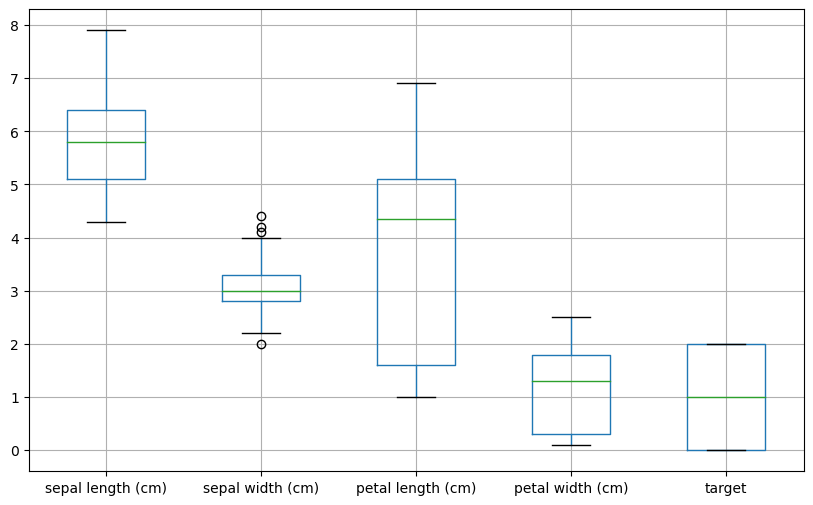

In [141]:
#look for outliers
df.boxplot(figsize=(10,6))
plt.show()

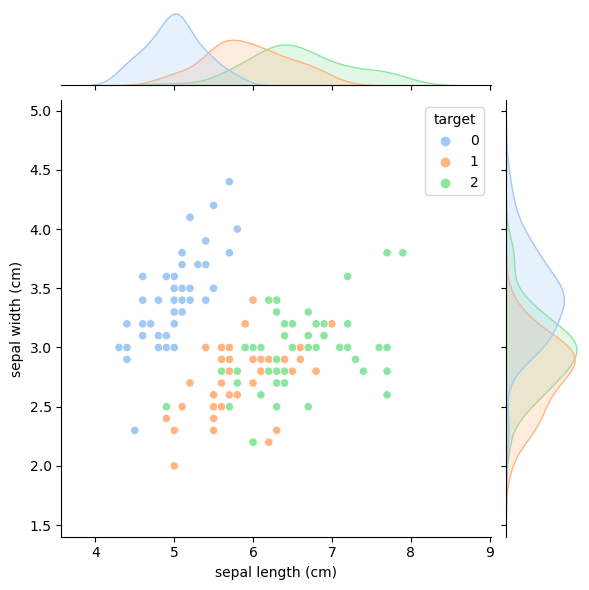

In [142]:
#Data Visualisation

sns.jointplot(x="sepal length (cm)", y ="sepal width (cm)", data=df , hue="target",
               palette="pastel")

c:\Users\amirah\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


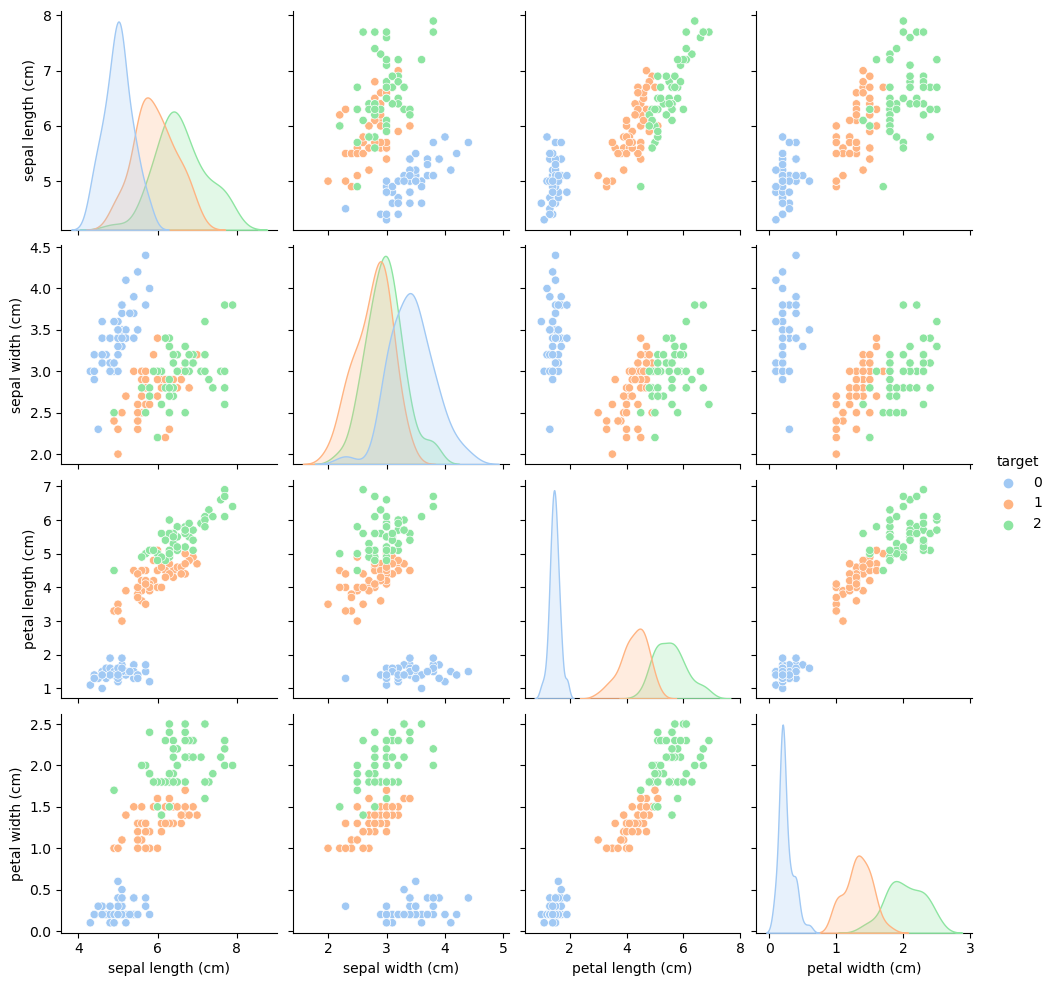

In [143]:
#Visualise all variables relationship with pairplot
sns.pairplot(df, hue="target", palette="pastel")
plt.show()

<Axes: >

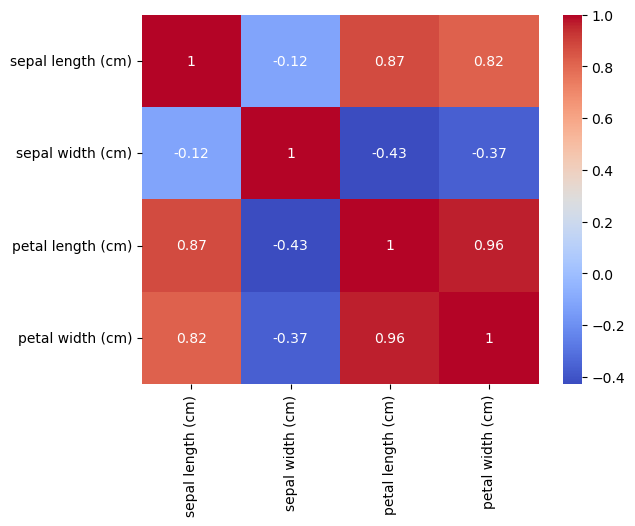

In [144]:
#find our correlation between features
df_cr = df.drop('target', axis=1)

corr = df_cr.corr()
sns.heatmap(corr, annot=True, cmap ="coolwarm")

In [145]:
#Data Preprocessing
df.isna().sum() #there's no missing values in this dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [146]:
#look for duplicated values
df.duplicated().sum()

1

In [147]:
# remove duplicated values
df = df.drop_duplicates()

In [148]:
#look for duplicated values - 0
df.duplicated().sum()

0

In [149]:
df.info() #149 entries

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [150]:
df['target'].value_counts()

target
0    50
1    50
2    49
Name: count, dtype: int64

In [151]:
#Train test split

features = df.drop('target', axis =1)
target = df['target']

x_train, x_test, y_train, y_test = model_selection.train_test_split(
features, target, test_size= 0.2, random_state=42)

In [122]:
#6. Model Development

knn = KNeighborsClassifier(n_neighbors=12)

In [123]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [124]:
test_predictions = knn.predict(x_test)

In [125]:
cm = confusion_matrix(y_test, test_predictions)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

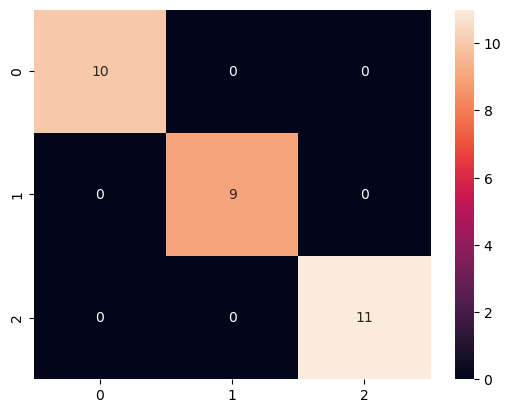

In [126]:
sns.heatmap(cm,annot=True)

In [127]:
print("Report for test predictions: \n",classification_report(y_test,test_predictions))

Report for test predictions: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[[40  0  0]
 [ 0 40  1]
 [ 0  3 35]]


<Axes: >

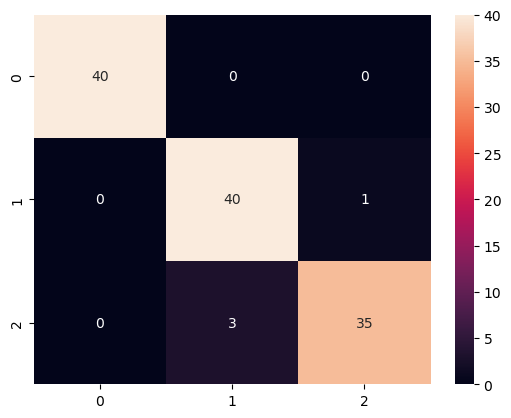

In [128]:
#Check for train predictions
train_predictions = knn.predict(x_train)
cm = confusion_matrix(y_train, train_predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [129]:
print("Report for train predictions: \n",classification_report(y_train,train_predictions))

Report for train predictions: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.98      0.95        41
           2       0.97      0.92      0.95        38

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



In [156]:
test = pd.DataFrame([[7.0,2.8,4.8,1.4]])
test.columns = x_test.columns

y = knn.predict(test)
print(y)

[1]
